In [1]:
import json
from datetime import datetime

import numpy as np


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
problem_index = 0

with open("problems.json", "r") as f:
    problem = json.load(f)[problem_index]

comment = f"problem_{problem_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = problem["desired"][0]
target_sigma_x = problem["desired"][2]
target_mu_y = problem["desired"][1]
target_sigma_y = problem["desired"][3]

target_mu_x_threshold = 3.3198e-6
target_mu_y_threshold = 3.3198e-6
target_sigma_x_threshold = 3.3198e-6
target_sigma_y_threshold = 3.3198e-6


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

initializing ocelot...


{'beam': array([ 0.00084821,  0.00019877, -0.00224748,  0.00022547], dtype=float32),
 'magnets': array([-2.5801668e-11, -2.5801668e-11, -6.9177379e-09, -2.5801668e-11,
        -6.9087887e-09], dtype=float32),
 'target': array([ 0.00011664,  0.00144437, -0.00131458,  0.00074719], dtype=float32)}

 40%|████      | 30/75 [13:44<07:59, 10.65s/it]  /home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:306: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
 67%|██████▋   | 50/75 [17:10<04:06,  9.87s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:306: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
76it [21:45, 17.18s/it]                        


title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2022-11-17 12:00:21.469807\nTime taken: 0:21:53.888716\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.8565 mm\n    sigma_x =  0.1974 mm\n    mu_y    = -2.2450 mm\n    sigma_y =  0.2275 mm\n\nBeam after:\n    mu_x    = -0.0282 mm\n    sigma_x =  0.0747 mm\n    mu_y    = -0.0184 mm\n    sigma_y =  0.0384 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0282 mm\n    |delta_sigma_x| =  0.0747 mm\n    |delta_mu_y|    =  0.0184 mm\n    |delta_sigma_y| =  0.0384 mm\n    \n    MAE =  0.0399 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.3925 1/m^2\n    AREAMQZM2 strength = -16.3698 1/m^2\n    AREAMCVM1 kick     = 

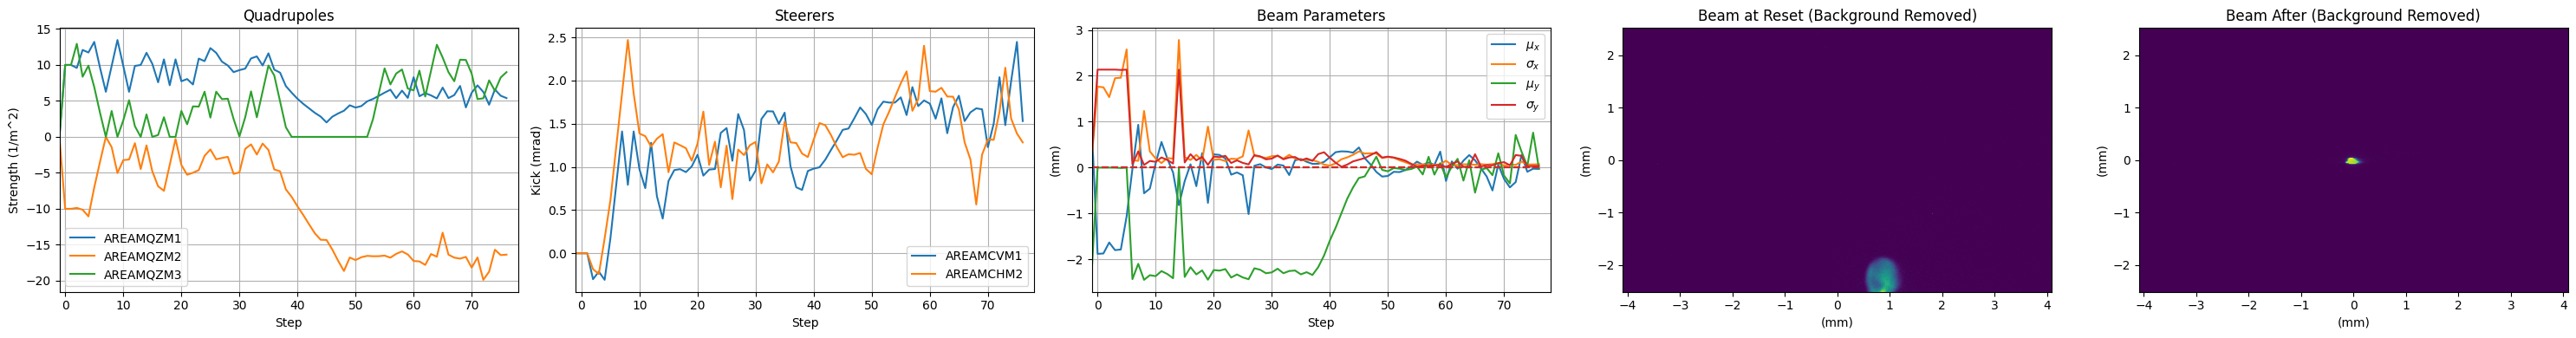

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=75,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="UCB",
    init_x=None,
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

initializing ocelot...


{'beam': array([ 0.0009229 ,  0.0001748 , -0.00210678,  0.00027846], dtype=float32),
 'magnets': array([-2.5801668e-11, -2.5801668e-11, -6.9177379e-09, -2.5801668e-11,
        -6.9087887e-09], dtype=float32),
 'target': array([ 0.00160508,  0.00086105, -0.00108054,  0.00181721], dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
100%|██████████| 50/50 [09:40<00:00, 11.61s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-11-17 12:34:38.981544\nTime taken: 0:09:46.013774\nNo. of steps: 50\n\nBeam before:\n    mu_x    =  0.9196 mm\n    sigma_x =  0.1776 mm\n    mu_y    = -2.1105 mm\n    sigma_y =  0.2795 mm\n\nBeam after:\n    mu_x    = -0.1195 mm\n    sigma_x =  0.2227 mm\n    mu_y    = -0.1554 mm\n    sigma_y =  0.2691 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.1195 mm\n    |delta_sigma_x| =  0.2227 mm\n    |delta_mu_y|    =  0.1554 mm\n    |delta_sigma_y| =  0.2691 mm\n    \n    MAE =  0.1917 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   9.1366 1/m^2\n    AREAMQZM2 strength = -12.8133 1/m^2\n    AREAMCVM1 kick 

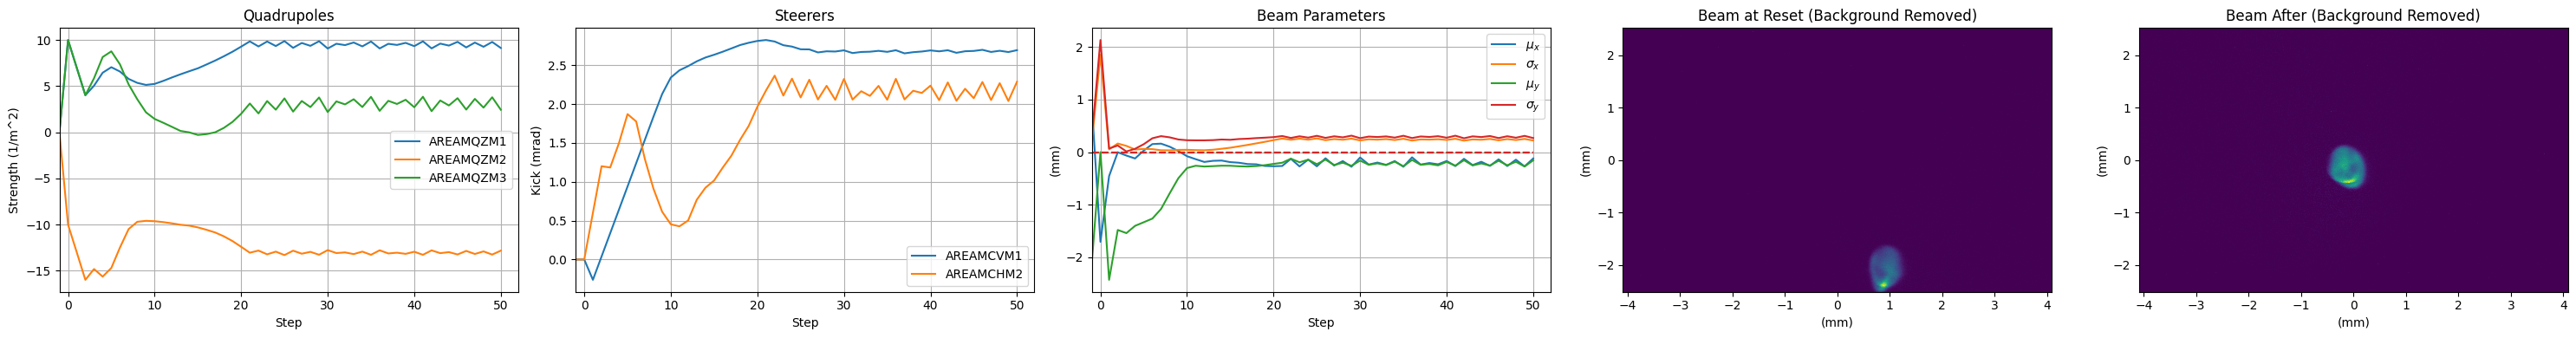

In [5]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=50,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)
